# Final Project Submission

Please fill out:
* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine the fair market value of homes coming onto the market based on a table of comparable homes (comps).  This automation the process of generating lists of comps to aid real estate agents and their clients in navigating the complex pricing structures around home sales. This has real world value in making available an accurate statistical model, with a standard p-value of .05 to discern which variables are most likely to affect home prices and by how much.

### Business Understanding
Comps are used daily to determine the value of homes coming onto the market by buyer, sellers and real estate professionals. Providing a service to automate the process by which comps are generated has a value to these three groups. Real estate professionals have traditionally used MLS to to run comparative market analysis, which is not available to non-professionals.  Therefore, this information will be of additionally high value to home owners and buyers as a way to generate concrete and accurate ideas of pricing structures, and therefor what to expect for their own buying and selling experiences, as well as a general idea of which features of their homes might be worth improving before sale. 

### Data Understanding
After checking our data for missing or null values, we wil begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarythmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [1]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data

In [2]:
## Check the columns and first few rows
df= pd.read_csv('Data/kc_house_data.csv')
len(df)

30155

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [49]:
# Generate summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values here, as well as visually inspect for for any missing values or irregularities.  So far it looks good!

In [50]:
#checking for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [4]:
#Because of the small number of NaN values, we can drop null rows
df.dropna(inplace=True)

### Inspect Columns and Investigate Datatypes

In [16]:
#Visualize datatypes for future analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long' which serve as unique identifiers.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  This is also a relatively long list of variables/columns.  If we were to run an OLE we would likely see that there was strong colinearity- that some of our fefatures were not independant.  We'll have to shorten this list for sure.  We can start by looking at whichc variables are redundent.  Examining the column values will help us to determine which of the variables might be close to or copies of the same information.

In [5]:
# Closer look at column values
x= open('Data/column_names.md')
print(x.read())

# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house 

We'll need to attend to the problems with "address". Only a few variables seem like duplicates.  We can see that sgft_living and sqft_above are similar, so we'll only use the former.  Let's dig in deeper though and take a look at a correlation heatmap of our dataframe to verify that co-linearity.

## Numeric Data

We'll begin by looking at the correlation of 'price' with all numeric categories.  We can see immediately that categorical numeric variables like 'id', 'lat' and 'long' are not useful in this context, so we'll create a subset of the continous numeric variables that look more promising.  The variables 'sqft_above' and 'sqft_living' have strong colinearity, so we'll drop 'sqft_above'.

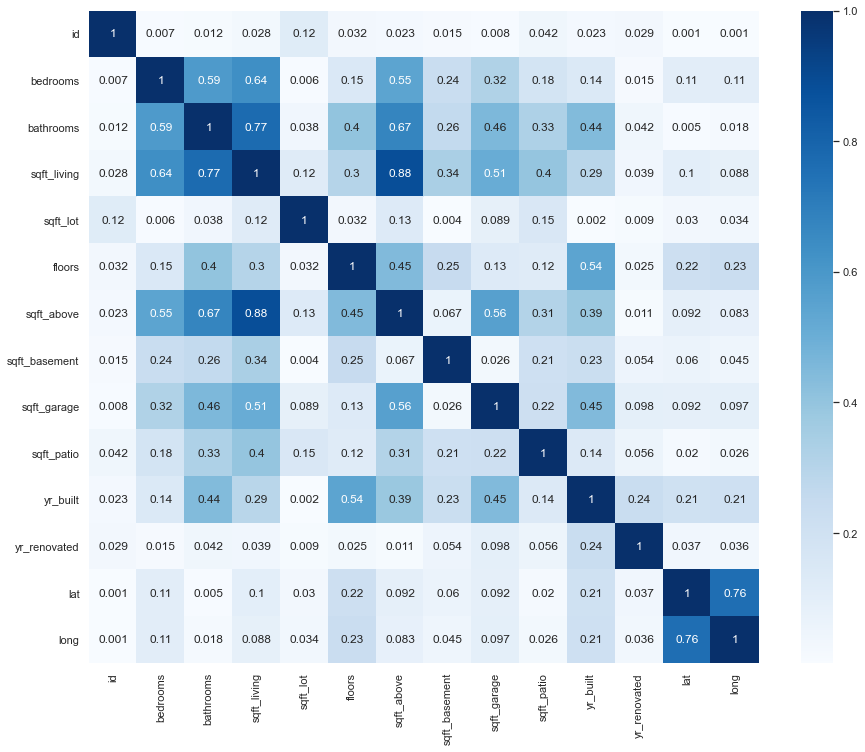

In [12]:
df_predictors = df.drop(columns=['price'])
corr = round(abs(df_predictors.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

In [6]:
kc_subset_dn= df[['price','sqft_living',
                  'bathrooms']]
abs(kc_subset_dn.corr()["price"]).sort_values(ascending=False)

price          1.000000
sqft_living    0.608616
bathrooms      0.480337
Name: price, dtype: float64

Our next step is to generate scatterplots to view the distributions of the  numeric variables that have the highest correlation to price and look for the visual markers of a linear relationship 

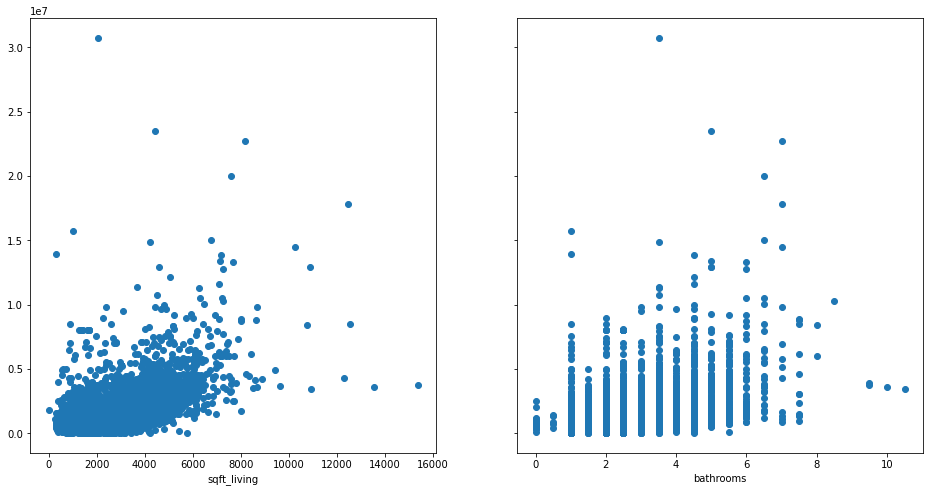

In [7]:
# Visualize relationships between variables and price
fig,axes= plt.subplots(ncols=2, figsize=(16,8), sharey=True)

for i, c in enumerate(kc_subset_dn.drop('price', axis=1).columns):
    ax=axes[i]
    ax.scatter(kc_subset_dn[c], kc_subset_dn['price'])
    ax.set_xlabel(c)

In [10]:
df['sqft_living'].describe()

count    30155.000000
mean      2112.424739
std        974.044318
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2619.500000
max      15360.000000
Name: sqft_living, dtype: float64

That 3 sqft_living doesnt make sense.  Let's make sure there aren't too many erroneous values

Our std of 976 indicates that we should also be looking for outliers- When considering mean house size, that's a pretty large margin of error and so there must be houses that are exceptionally large or small that are skewing our model. However, we need to be very careful about how we do this, as removing data can lead to model manipulation and less acuuracy overall.

In [9]:
q_low = df['sqft_living'].quantile(0.03)

q_high = df['sqft_living'].quantile(0.97)

In [10]:
df_clean= df[(df['sqft_living']< q_high) & (df['sqft_living']> q_low)]


In [11]:
df_clean['sqft_living'].describe()

count    28275.000000
mean      2061.109425
std        773.699199
min        846.000000
25%       1450.000000
50%       1920.000000
75%       2560.000000
max       4279.000000
Name: sqft_living, dtype: float64

In [49]:
#nothing obviously kooky here to fix
df['bathrooms'].describe()

count    30111.000000
mean         2.335708
std          0.888293
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max         10.500000
Name: bathrooms, dtype: float64

There is a clear relationship between both sqft_living and bathrooms to price, but the values will need to be normed before we can use them in our model- the plots demonstrate that there is a non-linear relationshipp by their distributions , and we'll need to fix that by applying a transformation.

## Categorical Data
Let's begin by looking at some graphs of our categorical data to see what might be a good candidate for OHE transformation.  We'll use bargraphs to see if there's a linear relationship between price and our variables.

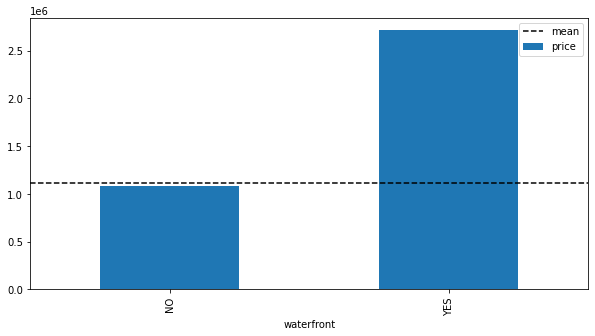

In [74]:
# Waterfront sns.barplot(data=df, x='waterfront', y='price')
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

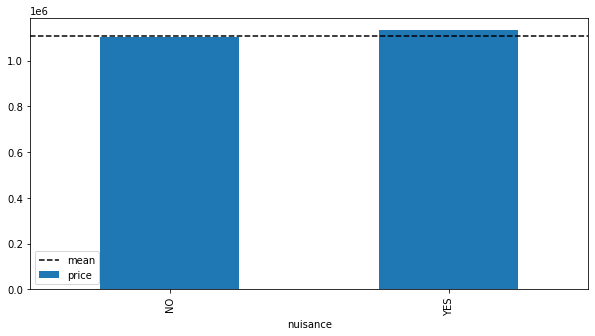

In [18]:
# nuisance doesn't look like it's relevant
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("nuisance").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

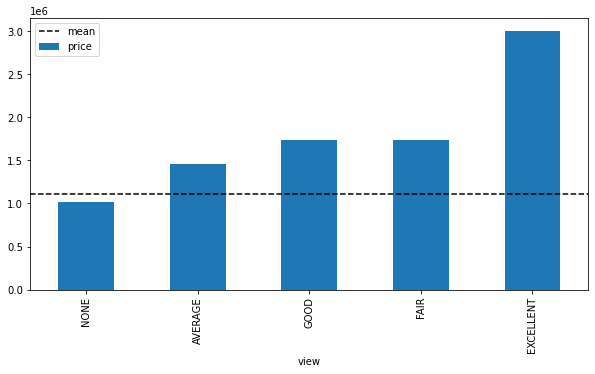

In [78]:
#view
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

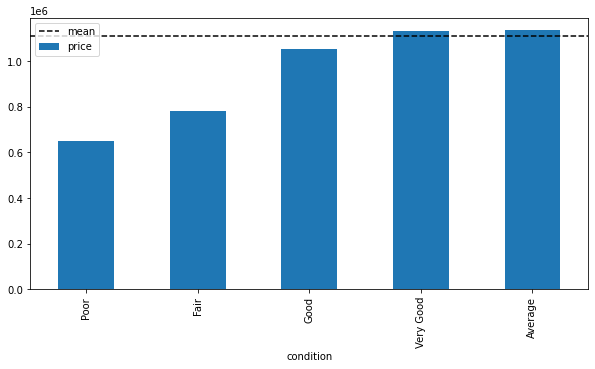

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [16]:
categoricals_clean = df_clean.select_dtypes("object")
categoricals_clean=categoricals_clean.drop(['date', 'address', ], axis=1).copy()

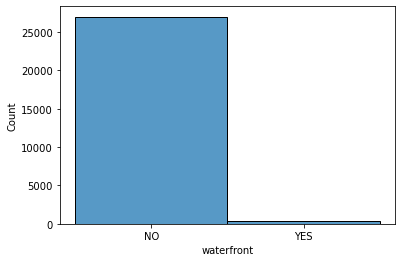

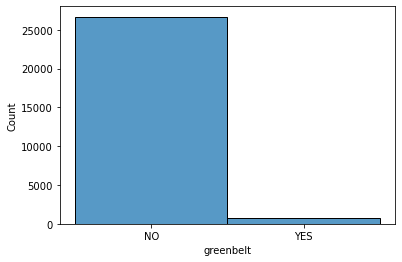

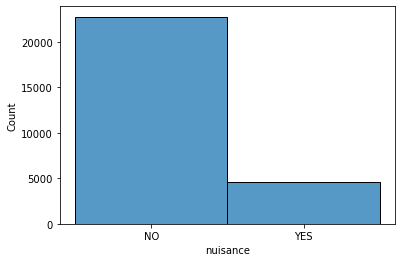

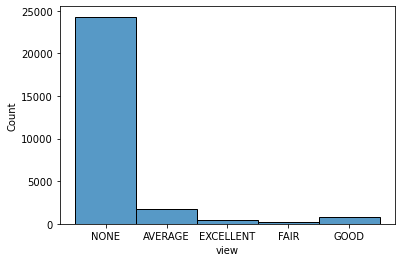

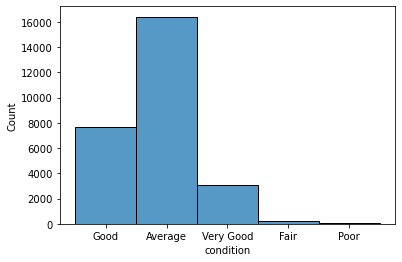

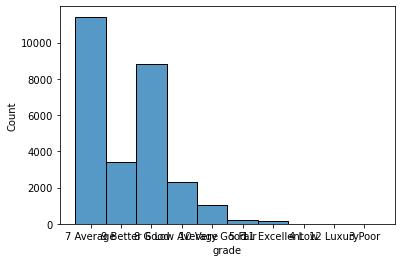

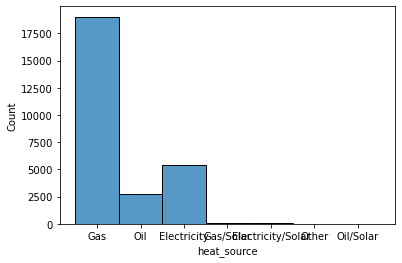

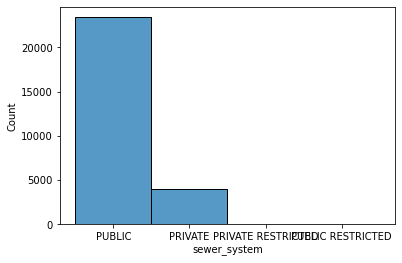

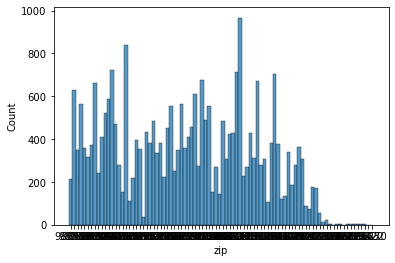

In [17]:
for i, col in enumerate(categoricals_clean.columns):
    plt.figure(i)
    sns.histplot(categoricals_clean[col])

Of the categorical variables, waterfront and condition seem the most likely to have a linear relationship with price

In [ ]:

y_raw = df["price"]
X_raw_cat = categoricals
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES', 'grade_2 Substandard', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC' ], axis=1, inplace=True)

In [41]:
#generate histograms of categorical variables to check for normal distribution
cat_colinearity= X_raw_cat
corr = round(abs(cat_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);
#too many categories to be useful

In [43]:
y= df_clean['price']
X_raw = df_clean[['sqft_living', 'waterfront', 'greenbelt', 'nuisance']]
X_raw = pd.get_dummies(X_raw, columns=[ 'waterfront', 'greenbelt', 'nuisance'])
X_raw.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES'], axis=1, inplace=True)



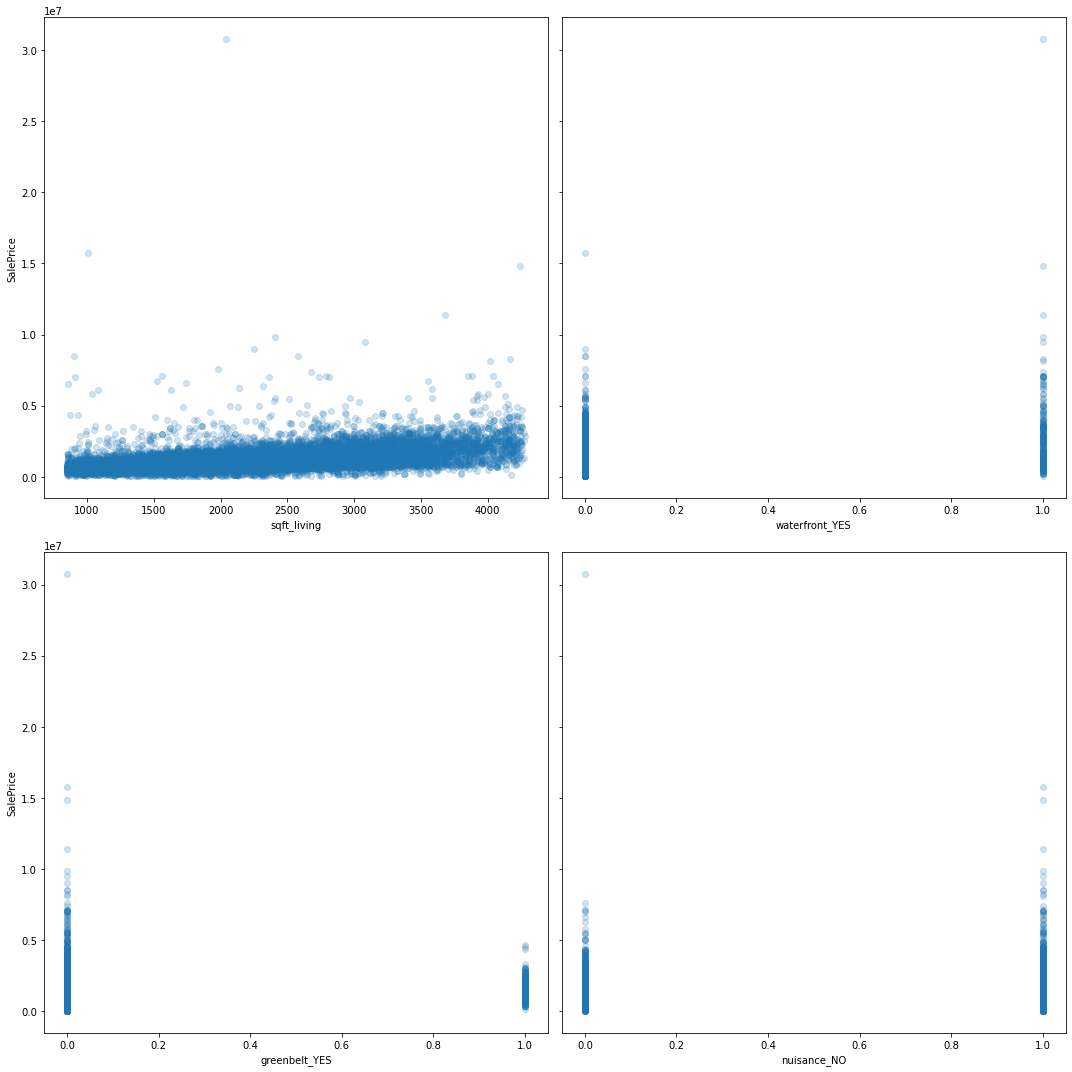

In [45]:
#look for good candidates for log transformations, maybe sqft_living
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

for i, column in enumerate(X_raw.columns):
    # Locate applicable axes
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X_raw[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']

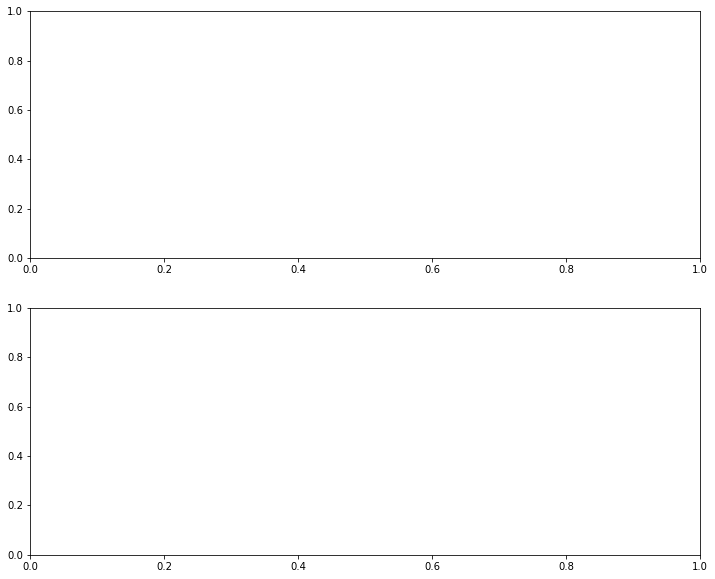

In [47]:
#look for features that would benefit from interaction terms with sqft_living
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,10))
df_clean.plot.scatter(x="sqft_living", y="price", c='grade', colormap="BuPu", ax=ax1)
df_clean.plot.scatter(x="sqft_living", y="price",c='', colormap='GnBu',  ax=ax2)
;

#### Add Zipcodes

In [12]:
#add zips
df_clean['zip'] = df_clean['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

<ipython-input-12-8bdd78fc2e90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['zip'] = df_clean['address'].str.findall(r'([0-9]\d+)').apply(


In [13]:
df_clean = df_clean[df_clean['zip'].astype(str).str.startswith('98')]

In [14]:
outer_limits= ['98077','98053', '98014', '98019', '98224', '98024', '98065',
'98027', '98045', '98038', '98022', '98051', '98010']
df_clean = df_clean[~df_clean['zip'].isin(outer_limits)]

In [ ]:
expensive_zips= df_clean[df_clean["p-value"] < 0.05].sort_values(by="coefficient")
len(results_df)

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
df_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [ ]:
std_thresh = kc_clean.price.std()*3

In [ ]:
y_raw = df_clean["price"]
X_raw = df_clean[['zip']]
X_raw = pd.get_dummies(X_raw, columns=['zip'])
X_raw.drop(['zip_98039', 'grade_3'], axis=1, inplace=True)

In [ ]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
baseline_results.summary()

In [ ]:
results2_df = pd.concat([X_centered_results.params,
                         X_centered_results.pvalues], axis=1)
results2_df.columns = ["coefficient", "p-value"]
results2_df

In [ ]:
results2_df = results2_df[results2_df["p-value"] < 0.05].sort_values(by="coefficient")
len(results_df)

## Modeling: Waterfront, Size, and Zip

#### 1st model

In [32]:
grade_dict = {'1 Cabin':0, '2 Substandard':1, '3 Poor':2,'4 Low':3,'5 Fair':4,'6 Low Average':5,'7 Average':6, '8 Good':7,
              '9 Better':8, '10 Very Good':9, '11 Excellent':10, '12 Luxury':11, '13 Mansion':12 }
df_clean.grade.replace(to_replace=grade_dict,inplace=True) 


In [33]:
df_clean= df_clean[(df_clean['grade']<11) & (df_clean['grade']> 2)]


In [38]:
y_raw = df_clean["price"]
X_raw = df_clean[['sqft_living', 'waterfront', 'greenbelt', 'nuisance']]
X_raw = pd.get_dummies(X_raw, columns=[ 'waterfront', 'greenbelt', 'nuisance'])
X_raw.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES'], axis=1, inplace=True)

In [39]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     2619.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:52:03   Log-Likelihood:            -3.4650e+05
No. Observations:               23587   AIC:                         6.930e+05
Df Residuals:                   23582   BIC:                         6.930e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.252e+05   1.31e+04      9.525      0.000    9.95e+04    1.51e+05
sqft_living      469.1298      5.004     93.746      0.000     459.321     478.938
waterfront_YES  1.144e+06   3.37e+04     33.922      0.000    1.08e+06    1.21e+06
greenbelt_YES   6.802e+04   2.83e+04      2.408      0.016    1.26e+04    1.23e+05
nuisance_NO    -5.207e+04   9839.020     -5.292      0.000   -7.14e+04   -3.28e+04
==============================================================================
Omnibus:                    34412.672   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         82630118.962
Skew:                           8.089   Prob(JB):                         0.00
Kurtosis:                     292.509   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

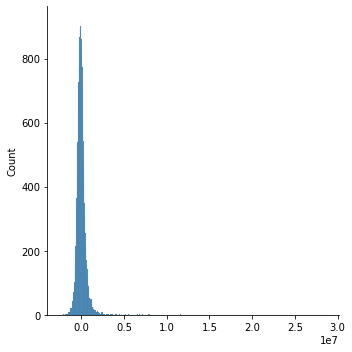

In [19]:
residuals = baseline_results.resid

sns.displot(residuals)
plt.show()


#### 2nd Model

In [59]:
std_thresh = df_clean.price.std()*3 # three standard deviations 
std_cap = df_clean.loc[abs(df_clean['price']) <= std_thresh] 
y = std_cap.price


In [68]:
std_cap.drop(['date', 'address', 'lat','long', 'id', 'floors', 'bedrooms', 'bathrooms',
                        'condition',  'heat_source', 'sewer_system', 'sqft_above','yr_built',
                        'yr_renovated', 'address', ], axis=1, inplace=True)

/Users/sarah/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
X_outliers_model = sm.OLS(y, sm.add_constant(std_cap))
X_outliers_model= pd.get_dummies(X_outliers_model)
X_raw_cat.drop(['waterfront_YES', 'greenbelt_YES',
               'nuisance_YES', 'zip_98045'], 
               axis=1, inplace=True)

X_outliers_results = X_outliers_model.fit()
X_outliers_results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [41]:

X_log = X_raw.copy()

X_log["log(sqft_living)"] = np.log(X_log["sqft_living"])


X_log.drop(['sqft_living', ], axis=1, inplace=True)


In [42]:
y_log = np.log(y_raw)
X_log_model = sm.OLS(y_log, sm.add_constant(X_log))
X_log_results = X_log_model.fit()
X_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2464.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:52:49   Log-Likelihood:                -15237.
No. Observations:               23587   AIC:                         3.048e+04
Df Residuals:                   23582   BIC:                         3.052e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.8617      0.061    128.254      0.000       7.742       7.982
waterfront_YES       0.4551      0.027     16.964      0.000       0.403       0.508
greenbelt_YES        0.1063      0.022      4.729      0.000       0.062       0.150
nuisance_NO         -0.0378      0.008     -4.832      0.000      -0.053      -0.022
log(sqft_living)     0.7783      0.008     95.821      0.000       0.762       0.794
==============================================================================
Omnibus:                     4670.922   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27467.429
Skew:                          -0.825   Prob(JB):                         0.00
Kurtosis:                       8.022   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3rd model

In [31]:
X_centered = X_sqft_log.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()

In [32]:
X_centered_model = sm.OLS(y_raw, sm.add_constant(X_centered))
X_centered_results = X_centered_model.fit()
X_centered_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     4990.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:50:57   Log-Likelihood:            -4.0268e+05
No. Observations:               27406   AIC:                         8.054e+05
Df Residuals:                   27403   BIC:                         8.054e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.052e+06   3515.769    299.197      0.000    1.05e+06    1.06e+06
waterfront_YES    9.496e+05   2.92e+04     32.485      0.000    8.92e+05    1.01e+06
log(sqft_living)  8.733e+05   9378.088     93.126      0.000    8.55e+05    8.92e+05
==============================================================================
Omnibus:                    38534.511   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         75260343.887
Skew:                           7.552   Prob(JB):                         0.00
Kurtosis:                     259.279   Cond. No.                         8.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
mae_baseline = baseline_results.resid.abs().sum() / len(y_raw)
print(mae_baseline)

mae_logcentered = X_centered_results.resid.abs().sum() / len(y_log)
print(mae_logcentered)

206051.10312685484
203412.82660191404


### 4th Model

In [95]:
y2_raw = df_clean["price"]
X2_raw = df_clean[['grade', 'zip']]
X2_raw = pd.get_dummies(X2_raw, columns=["grade", 'zip'])
X2_raw.drop(['grade_3 Poor', 'zip_98059' ], axis=1, inplace=True)

In [96]:
X2_model = sm.OLS(y2_raw, sm.add_constant(X2_raw))
X2_results = X2_model.fit()
X2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     317.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:07:47   Log-Likelihood:            -3.9667e+05
No. Observations:               27406   AIC:                         7.935e+05
Df Residuals:                   27309   BIC:                         7.943e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.774e+05   2.71e+05      3.233      0.001    3.46e+05    1.41e+06
grade_10 Very Good     8.9e+05   2.71e+05      3.284      0.001    3.59e+05    1.42e+06
grade_11 Excellent   1.669e+06   2.73e+05      6.115      0.000    1.13e+06     2.2e+06
grade_12 Luxury      1.663e+06   2.94e+05      5.664      0.000    1.09e+06    2.24e+06
grade_4 Low         -2.671e+05   3.31e+05     -0.806      0.420   -9.17e+05    3.82e+05
grade_5 Fair        -1.996e+05   2.73e+05     -0.732      0.464   -7.34e+05    3.35e+05
grade_6 Low Average  -1.47e+05   2.71e+05     -0.543      0.587   -6.78e+05    3.84e+05
grade_7 Average     -7.079e+04   2.71e+05     -0.262      0.794   -6.01e+05     4.6e+05
grade_8 Good         1.308e+05   2.71e+05      0.483      0.629      -4e+05    6.61e+05
grade_9 Better       4.973e+05   2.71e+05      1.837      0.066   -3.34e+04    1.03e+06
zip_98001           -2.859e+05   2.75e+04    -10.413      0.000    -3.4e+05   -2.32e+05
zip_98002           -3.129e+05   3.22e+04     -9.728      0.000   -3.76e+05    -2.5e+05
zip_98003           -2.983e+05   3.01e+04     -9.916      0.000   -3.57e+05   -2.39e+05
zip_98004             1.61e+06   3.72e+04     43.296      0.000    1.54e+06    1.68e+06
zip_98005             7.99e+05   4.26e+04     18.771      0.000    7.16e+05    8.82e+05
zip_98006            4.889e+05   2.94e+04     16.629      0.000    4.31e+05    5.47e+05
zip_98007            3.831e+05    4.3e+04      8.914      0.000    2.99e+05    4.67e+05
zip_98008            4.767e+05   3.11e+04     15.342      0.000    4.16e+05    5.38e+05
zip_98010            -1.91e+05   3.35e+04     -5.711      0.000   -2.57e+05   -1.25e+05
zip_98011            1.812e+05   3.55e+04      5.103      0.000    1.12e+05    2.51e+05
zip_98014           -3.264e+04   4.35e+04     -0.750      0.454   -1.18e+05    5.27e+04
zip_98019           -5.823e+04   3.61e+04     -1.612      0.107   -1.29e+05    1.26e+04
zip_98022           -2.535e+05   3.01e+04     -8.426      0.000   -3.12e+05   -1.95e+05
zip_98023           -3.609e+05   2.69e+04    -13.408      0.000   -4.14e+05   -3.08e+05
zip_98024            4.529e+05   4.98e+04      9.087      0.000    3.55e+05    5.51e+05
zip_98027            2.079e+05   3.18e+04      6.541      0.000    1.46e+05     2.7e+05
zip_98028            1.067e+05   3.23e+04      3.307      0.001    4.34e+04     1.7e+05
zip_98029             2.74e+05   3.34e+04      8.212      0.000    2.09e+05    3.39e+05
zip_98030           -2.843e+05   3.14e+04     -9.060      0.000   -3.46e+05   -2.23e+05
zip_98031           -2.701e+05   2.86e+04     -9.453      0.000   -3.26e+05   -2.14e+05
zip_98032           -2.766e+05   4.05e+04     -6.820      0.000   -3.56e+05   -1.97e+05
zip_98033            8.171e+05    2.8e+04     29.186      0.000    7.62e+05    8.72e+05
zip

In [97]:
mae_X2 = X2_results.resid.abs().sum() / len(y2_raw)
print(mae_X2)

253406.44681063117


In [ ]:
X2_centered = X2_raw.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

In [98]:
y2_log = np.log(y2_raw)
X2_log= X2_raw

In [100]:
X2_log_model = sm.OLS(y2_log, sm.add_constant(X2_log))
X2_log_results = X2_log_model.fit()
X2_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     385.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:12:08   Log-Likelihood:                -10310.
No. Observations:               27406   AIC:                         2.081e+04
Df Residuals:                   27309   BIC:                         2.161e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0379      0.205     63.716      0.000      12.637      13.439
grade_10 Very Good      1.1907      0.204      5.825      0.000       0.790       1.591
grade_11 Excellent      1.4273      0.206      6.936      0.000       1.024       1.831
grade_12 Luxury         1.4327      0.221      6.470      0.000       0.999       1.867
grade_4 Low            -0.0493      0.250     -0.197      0.844      -0.539       0.440
grade_5 Fair            0.2350      0.206      1.142      0.253      -0.168       0.638
grade_6 Low Average     0.3573      0.204      1.750      0.080      -0.043       0.758
grade_7 Average         0.5212      0.204      2.554      0.011       0.121       0.921
grade_8 Good            0.7312      0.204      3.583      0.000       0.331       1.131
grade_9 Better          0.9952      0.204      4.875      0.000       0.595       1.395
zip_98001              -0.3601      0.021    -17.395      0.000      -0.401      -0.320
zip_98002              -0.4788      0.024    -19.743      0.000      -0.526      -0.431
zip_98003              -0.4167      0.023    -18.368      0.000      -0.461      -0.372
zip_98004               0.8724      0.028     31.114      0.000       0.817       0.927
zip_98005               0.5819      0.032     18.128      0.000       0.519       0.645
zip_98006               0.3903      0.022     17.604      0.000       0.347       0.434
zip_98007               0.3550      0.032     10.955      0.000       0.292       0.419
zip_98008               0.4134      0.023     17.642      0.000       0.367       0.459
zip_98010              -0.1792      0.025     -7.103      0.000      -0.229      -0.130
zip_98011               0.1880      0.027      7.021      0.000       0.136       0.241
zip_98014              -0.0338      0.033     -1.030      0.303      -0.098       0.031
zip_98019              -0.0144      0.027     -0.528      0.597      -0.068       0.039
zip_98022              -0.3193      0.023    -14.074      0.000      -0.364      -0.275
zip_98023              -0.4177      0.020    -20.576      0.000      -0.457      -0.378
zip_98024               0.2497      0.038      6.642      0.000       0.176       0.323
zip_98027               0.2143      0.024      8.944      0.000       0.167       0.261
zip_98028               0.1044      0.024      4.292      0.000       0.057       0.152
zip_98029               0.2565      0.025     10.194      0.000       0.207       0.306
zip_98030              -0.3458      0.024    -14.613      0.000      -0.392      -0.299
zip_98031              -0.3421      0.022    -15.877      0.000      -0.384      -0.300
zip_98032              -0.3733      0.031    -12.209      0.000      -0.433      -0.313
zip_98033               0.5732      0.021     27.149      0.000       0.532       0.615
zip

In [37]:
mae_X2log = X2_log_results.resid.abs().sum() / len(y_log)
print(mae_X2log)

370580.1998457168


In [38]:
X2_log_centered = X2_sqft_log.copy()

for col in X2_log_centered.columns:
    X2_log_centered[col] = X2_log_centered[col] - X2_log_centered[col].mean()

NameError: name 'X2_sqft_log' is not defined

In [54]:
y2_log_centered = y2_raw
X2_log_centered_model = sm.OLS(y2_log_centered, sm.add_constant(X2_log_centered))
X2_log_centered_results = X_centered_model.fit()
X2_log_centered_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     425.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:57:58   Log-Likelihood:            -4.2945e+05
No. Observations:               29200   AIC:                         8.591e+05
Df Residuals:                   29110   BIC:                         8.598e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.113e+06   3459.082    321.765      0.000    1.11e+06    1.12e+06
waterfront_YES    1.444e+06    2.7e+04     53.424      0.000    1.39e+06     1.5e+06
zip_98001        -6.134e+05   3.83e+04    -16.028      0.000   -6.88e+05   -5.38e+05
zip_98002        -5.194e+05   4.32e+04    -12.019      0.000   -6.04e+05   -4.35e+05
zip_98003        -5.641e+05   4.12e+04    -13.692      0.000   -6.45e+05   -4.83e+05
zip_98004         2.034e+06   4.49e+04     45.335      0.000    1.95e+06    2.12e+06
zip_98005         6.823e+05   5.37e+04     12.713      0.000    5.77e+05    7.88e+05
zip_98006         3.727e+05   3.98e+04      9.373      0.000    2.95e+05    4.51e+05
zip_98007         1.431e+05   5.63e+04      2.539      0.011    3.26e+04    2.54e+05
zip_98008          2.39e+05   4.23e+04      5.657      0.000    1.56e+05    3.22e+05
zip_98010        -6.632e+05    4.5e+04    -14.731      0.000   -7.51e+05   -5.75e+05
zip_98011        -1.356e+05   4.74e+04     -2.861      0.004   -2.28e+05   -4.27e+04
zip_98014         -3.69e+05   5.61e+04     -6.579      0.000   -4.79e+05   -2.59e+05
zip_98019        -3.384e+05   4.83e+04     -7.007      0.000   -4.33e+05   -2.44e+05
zip_98022        -5.098e+05   4.08e+04    -12.486      0.000    -5.9e+05    -4.3e+05
zip_98023        -6.196e+05   3.75e+04    -16.520      0.000   -6.93e+05   -5.46e+05
zip_98024         8.895e+04   6.31e+04      1.411      0.158   -3.46e+04    2.13e+05
zip_98027        -1.927e+04   4.27e+04     -0.451      0.652   -1.03e+05    6.45e+04
zip_98028        -2.212e+05   4.37e+04     -5.065      0.000   -3.07e+05   -1.36e+05
zip_98029         1.715e+05   4.47e+04      3.835      0.000    8.38e+04    2.59e+05
zip_98030        -5.792e+05   4.28e+04    -13.537      0.000   -6.63e+05   -4.95e+05
zip_98031        -5.596e+05   3.95e+04    -14.156      0.000   -6.37e+05   -4.82e+05
zip_98032        -5.497e+05   5.29e+04    -10.383      0.000   -6.53e+05   -4.46e+05
zip_98033         6.642e+05   3.85e+04     17.243      0.000    5.89e+05     7.4e+05
zip_98034         4.761e+04   3.76e+04      1.267      0.205    -2.6e+04    1.21e+05
zip_98038        -5.151e+05   3.62e+04    -14.213      0.000   -5.86e+05   -4.44e+05
zip_98039         3.543e+06   8.28e+04     42.775      0.000    3.38e+06     3.7e+06
zip_98040         1.059e+06    4.4e+04     24.087      0.000    9.73e+05    1.14e+06
zip_98042        -5.765e+05   3.54e+04    -16.262      0.000   -6.46e+05   -5.07e+05
zip_98045        -3.457e+05   4.07e+04     -8.487      0.000   -4.26e+05   -2.66e+05
zip_98047        -5.368e+05   7.38e+04     -7.278      0.000   -6.81e+05   -3.92e+05
zip_98050         1.816e+05   4.19e+05      0.433      0.665    -6.4e+05       1e+06
zip_98051        -4.055e+05   7.87e+04     -5.149      0.000    -5.6e+05   -2.51e+05
zip_98052         2.271

In [55]:
mae_X2c = X2_log_centered_results.resid.abs().sum() / len(y_log)
print(mae_X2c)

299918.66959426523


## Raising variables exponetially

In [61]:
X_quad = X.copy()
X_quad['sq_living'] = X_quad**2
X_quad= 

0                                                         1180
1                                                         2770
2                                                         2880
3                                                         2160
4                                                         1120
                                   ...                        
30151                                                     2020
30152                                                     1620
30153                                                     2570
30154                                                     1200
sq_living    0        1392400
1        7672900
2        829...
Name: sqft_living, Length: 30112, dtype: object

In [63]:
#squared_results = sm.OLS(y, sm.add_constant(X_quad)).fit()

### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x)

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)

* Model residuals are normally distributed

* Homoscedasticity- data has an equal variance

Per Assumptions for Linear Regression: "Looking at the residuals is the single best way to flag potential violations of linear regression assumptions and figure out what to do about them."


#### Shifting our Model to Improve Intercept Interpretability
So far our models have been unchanged by any kind of linear or logarithmic transformations.  We'll take time now to: 
* zero centering some of our variables to make more interpretable predictions of the mean value of a house with stated features.

* Log transform irregular distributions in "sqft_living" to normalize distribution

* OHE conditional the variables 'waterfront' and 'nuisance' to add to our multiple linear regression model

If the model is correctly specified, then we should not see curvature in the residuals

In [22]:
y_raw = df["price"]
X_raw = df[['sqft_living', 'waterfront', 'bathrooms']]
X_raw = pd.get_dummies(X_raw, columns=["waterfront"], drop_first=True)

X_raw

,sqft_living,bathrooms,waterfront_YES
0,1180,1.0,0
1,2770,2.5,0
2,2880,2.0,0
3,2160,3.0,0
4,1120,2.0,0
...,...,...,...
30150,1910,2.0,0
30151,2020,2.0,0
30152,1620,2.0,0
30153,2570,2.5,0


In [23]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     6847.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:40:18   Log-Likelihood:            -4.4760e+05
No. Observations:               30111   AIC:                         8.952e+05
Df Residuals:                   30107   BIC:                         8.952e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.736e+04   1.12e+04     -8.

In [42]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(baseline_results)

(1.0981647799843925, 4.641430481803289e-09)

In [ ]:
# 2nd model, interactions

y_2 = df_kc["price"]
X_2 = df_kc[['sqft_living', 'waterfront', 'zip']]
X_2 = pd.get_dummies(X_2, columns=['zip'])
X_2.drop(['zip_98116'], axis=1, inplace=True)
X_2['sqft_Medina'] = X_2['sqft_living']* (X_2['zip_98039']) 
X_2['sqft_Skykomish'] = X_2['sqft_living']* (X_2['zip_98288']

# Notes/Thing to Try

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
y=df['price']
X=X_raw

In [35]:
linear_results = sm.OLS(y, sm.add_constant(X)).fit()


r-squared: 0.4055094438668765


In [ ]:
#to check column names after OHE
"""
df['column_name'].value_counts()
"""

# Seaborne regplot to visualize original data with regression line 

"""
(need to use after making model with OLS)
sns.regplot(x="sqft_living", y="price", data=df);
"""

# checking for linearity in residuals
"""linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");"""

# To make a model
"""

data = pd.read_csv("auto-mpg.csv")
y_raw = data["mpg"]
X_raw = data[["weight", "model year"]]
X_raw

baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())
"""

# to transform values log

"""
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log[["weight", "log(weight)"]]

"""
# Plot distributions of raw vs. transformed values
# (scales are so different that it's not reasonable to share an x-axis)
"""
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_weight_log["weight"])
ax1.set_xlabel("weight")
ax2.hist(X_weight_log["log(weight)"], color="orange")
ax2.set_xlabel("log(weight)");
"""

# compare original to log
"""
weight_log_model = sm.OLS(y_raw, sm.add_constant(X_weight_log))
weight_log_results = weight_log_model.fit()

print(f"""
Baseline model adjusted R-Squared:    {baseline_results.rsquared_adj}
log(weight) model adjusted R-Squared: {weight_log_results.rsquared_adj}
""")

"""

# Map and Zipcodes

In [37]:
X_sqft_log = X_raw.copy()

X_sqft_log["log(sqft_living)"] = np.log(X_sqft_log["sqft_living"])

# Visually inspect raw vs. transformed values
X_sqft_log[["sqft_living", "log(sqft_living)"]]

,sqft_living,log(sqft_living)
0,1180,7.073270
1,2770,7.926603
2,2880,7.965546
3,2160,7.677864
4,1120,7.021084
...,...,...
30150,1910,7.554859
30151,2020,7.610853
30152,1620,7.390181
30153,2570,7.851661


Text(0.5, 0, 'log(sqft_living)')

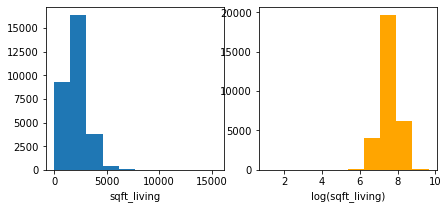

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_sqft_log["sqft_living"])
ax1.set_xlabel("sqft_living")
ax2.hist(X_sqft_log["log(sqft_living)"], color="orange")
ax2.set_xlabel("log(sqft_living)")

In [41]:
X_sqft_log.drop('sqft_living', axis=1, inplace=True)

y_log = y_raw
X_log_model = sm.OLS(y_log, sm.add_constant(X_sqft_log))
X_log_results = X_log_model.fit()


print(X_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4872.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:            -4.4948e+05
No. Observations:               30111   AIC:                         8.990e+05
Df Residuals:                   30107   BIC:                         8.990e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.712e+06   9.96e+04  

In [ ]:
log_model = sm.OLS(y_log, sm.add_constant(X_log))
log_results = log_model.fit()
print(baseline_results.summary())

## Map and Neighborhoods

In [ ]:

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [ ]:
#Define coordinates of where we want to center our map
kc_coords = [47.6561, -122.005]

#Create the map
my_map = folium.Map(location = kc_coords, zoom_start = 13)

#Display the map
my_map

In [ ]:
#Create the dataframe containing the data we want.
dfmap.zipcode = df_kc.zip.astype(int)
zipcode_means = []
for i in dfmap.zipcode.unique().tolist():
    val = dfmap[dfmap['zip'] == i]['price'].mean()
    lat = dfmap[dfmap['zip'] == i]['lat'].mean()
    long = dfmap[dfmap['zip'] == i]['long'].mean()
    zipcode_means.append([str(i), val, lat, long])
xall = []
yall = []
latall = []
longall = []
for val in zipcode_means:
    xall.append(val[0])
    yall.append(val[1])
    latall.append(val[2])
    longall.append(val[3])
tdf = pd.DataFrame(list(zip(xall, yall, latall, longall)),
                    columns = ['Zipcode', 'Price', 'Latitude', 'Longitude'])

In [ ]:

# Import King County and surrounding areas csv dataset from gis-kingcounty.opendata.arcgis.com/dataset
kc_geodata= pd.read_csv('zipcode_csv/kc_zip.csv')

In [ ]:

# Inspect df 
kc_geodata

In [ ]:

# Includes surrounding counties, so clean so only 'King' county remains
kc_geodata= kc_geodata[kc_geodata['COUNTY_NAME'] == 'King County']

In [ ]:
for z in kc_clean['zip']:
    for zc in kc_geodata['ZIPCODE']:
        if z == zc:
            kc_clean['neighborhood']=kc_geodata['PREFERRED_CITY']

In [18]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
df['zip'] = df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

In [27]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= df['zip'].value_counts()
zip_counts

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
47575      1
11373      1
68826      1
64156      1
48503      1
Name: zip, Length: 399, dtype: int64

In [47]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = df[~df['zip'].astype(str).str.startswith('98')]
print(df_bad_zips['address'])

12       5712 A Street, Omaha, Nebraska 68106, United S...
53       1820 South State Street, Vineland, New Jersey ...
62       1804 Spruce Street, McLeansboro, Illinois 6285...
159      626 13th Street, Union City, New Jersey 07087,...
172      11th Avenue, West Babylon, New York 11704, Uni...
                               ...                        
30029    Avenue Cuts, 34 Ridge Rd, North Arlington, New...
30044    36th Avenue, Kenosha, Wisconsin 53142, United ...
30116    57th Street Lane NW, Rochester, Minnesota 5590...
30129    214 B, Mount Laurel, New Jersey 08054, United ...
30144    2954 Northwest 85th Street, Miami, Florida 331...
Name: address, Length: 914, dtype: object


In [48]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
4137,2902200584,12/11/2021,750000.0,2,2.0,880,892,3.0,NO,NO,...,880,0,0,320,2017,0,"2213 Highway a, Washington, Missouri 63090, Un...",38.531593,-91.021341,63090
7064,597000591,4/13/2022,715000.0,3,2.5,1530,1101,2.0,NO,NO,...,1040,490,0,375,2009,0,"Beacon Ave, Washington, Pennsylvania 15301, Un...",40.105940,-80.317920,15301
10445,1959701116,3/17/2022,1325000.0,3,2.0,1440,980,2.0,NO,NO,...,960,480,0,510,2018,0,"2708 Highway a, Washington, Missouri 63090, Un...",38.534190,-91.020571,63090
12986,6003500644,11/21/2021,759950.0,2,2.0,1020,740,2.0,NO,NO,...,680,340,0,340,2020,0,"1728 East 11th Avenue, Spokane, Washington 992...",47.645200,-117.384760,99202
17304,2770602496,8/20/2021,789995.0,2,2.0,1310,1220,2.0,NO,NO,...,840,470,0,310,2013,0,"21st Avenue, Clarkston, Washington 99403, Unit...",46.389970,-117.056550,99403
18767,2902200797,9/7/2021,1224000.0,3,2.0,1640,1040,3.0,NO,NO,...,1640,0,0,580,2020,0,"2368 Highway a, Washington, Missouri 63090, Un...",38.524842,-91.025180,63090
22537,5414100061,1/2/2022,679950.0,2,2.0,1170,761,3.0,NO,NO,...,1170,0,0,290,2021,0,"East 32nd Avenue, Spokane, Washington 99203, U...",47.625580,-117.395840,99203
25314,1703400362,2/15/2022,879000.0,3,2.0,1610,1005,3.5,NO,NO,...,1610,0,0,230,2021,0,"4736 East 35th Avenue, Spokane, Washington 992...",47.622819,-117.347162,99223


In [49]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_kc = df[df['zip'].astype(str).str.startswith('98')]
len(df_kc)

29241

In [52]:
#Check if we've got the right number of records 
bool(len(df_kc) + len(df_bad_zips)==len(df))

True

In [ ]:
import re


In [ ]:
re.findall(^\d, 98)

In [ ]:
pip install geopy
from geopy.geocoders import Nominatim


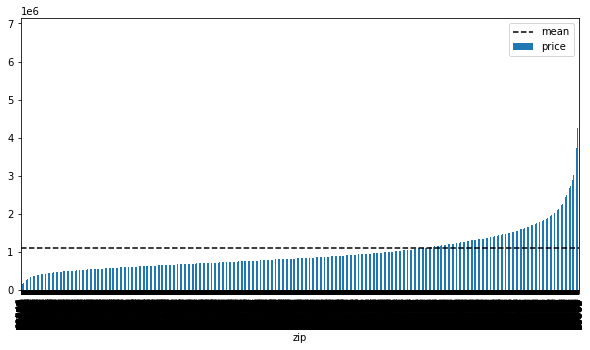

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
zip,,,,,,,,,,,,,,,,,,,,,
01541,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
02066,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
02134,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
02149,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
02341,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99403,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
99501,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
99504,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [6]:
zips= pd.read_csv('zips/zip_code_database.csv')
zips_kc= zips[zips['zip'].astype(str).str.startswith('981')]
zips_kc

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
186,981,PO BOX,0,Carolina,NaN,Isla Verde,PR,Carolina,America/Puerto_Rico,NaN,NaN,US,18.40,-65.98,0
3678,9810,MILITARY,0,Apo,NaN,NaN,AE,NaN,NaN,NaN,EU,TR,0.00,0.00,0
3679,9811,MILITARY,0,Dpo,NaN,NaN,AE,NaN,NaN,NaN,NaN,US,0.00,0.00,0
3680,9812,MILITARY,0,Dpo,NaN,NaN,AE,NaN,NaN,NaN,NaN,US,0.00,0.00,0
3681,9813,MILITARY,0,Dpo,NaN,NaN,AE,NaN,NaN,NaN,NaN,US,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41860,98191,UNIQUE,0,Seattle,NaN,Qwest,WA,King County,America/Los_Angeles,206,NaN,US,47.61,-122.33,0
41861,98194,PO BOX,0,Seattle,NaN,NaN,WA,King County,America/Los_Angeles,206,NaN,US,47.61,-122.33,299
41862,98195,UNIQUE,0,Seattle,NaN,Univ Of Washington,WA,King County,America/Los_Angeles,206,NaN,US,47.65,-122.31,192
41863,98198,STANDARD,0,Seattle,"Des Moines, Normandy Park, Seatac",Redondo Beach,WA,King County,America/Los_Angeles,"206,253",NaN,US,47.38,-122.31,34610


In [ ]:
zips_kc.rename(columns={"primary_city": "neighborhood"}, inplace=True)
zips_kc

In [ ]:
#trying to get town names:
# Didn't work:
#df_kc['neighborhood']= np.where(df_kc['zip']== zips_kc['zip'], zips_kc['neighborhood'], "none")

#Didn't work
#def f[]:
#df_kc['neighborhood']= np.where(zips_kc_final['primary_city']) if
 #   df_kc.apply(lambda row: df_kc['zip']==zips_kc_final['zip'], axis=1) 

In [ ]:
df_kc['zip']= df_kc['zip'].apply(pd.to_numeric)  
zips_kc_final=zips_kc['zip'].astype(int).copy()
zips_kc_final['neighborhood']= zips_kc['primary_city'].copy()